**MOVIES DATA ANALYTICS**

         
**Introduction**

The entertainment landscape is experiencing notable transformations, driven by the rising popularity of streaming services and the increasing demand for original content. Acknowledging this shift, Microsoft has opted to venture into the film industry. The objective of this analysis is to offer thorough insights into present trends, enabling Microsoft to make well-informed choices regarding the genres and styles of films to develop.

**Business Understanding**
This nalysis seeks to understand the dynamic landscape of the movie industry. By answering questions such as the genres that perform well, audience preferences, and key factors influencing box office success, with the aim of equiping Microsoft with actionable insights. These insights will guide decisions on film production, marketing strategies, and audience engagement.

**Dataset Overview**
This dataset comprises of information from various sources, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. Each dataset has unique features, and understanding their relationships is crucial.


In [1]:
# load the data
import pandas as pd
import seaborn as sns

In [2]:
#EXTRACTING AND ANALYZING DATA FROM im.db
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect(r"C:\Users\Hp\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\im.db")

# Create a cursor object
cursor = conn.cursor()

# Get the list of tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the table names
table_names = cursor.fetchall()

# Display the table names
for table in table_names:
    print(table[0])


movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [3]:
# Fetch all the results into a DataFrame from movie basics table
df_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

In [4]:
#displaying data in movie basics table
df_movie_basics.head(1)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [5]:
#Checking basic statistics of numerical rows 
df_movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [6]:
#Checking for missing values
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
# Drop rows with missing values
df_movie_basics_cleaned = df_movie_basics.dropna()
df_movie_basics_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
# Modify the original DataFrame in place
df_movie_basics.dropna(inplace=True)

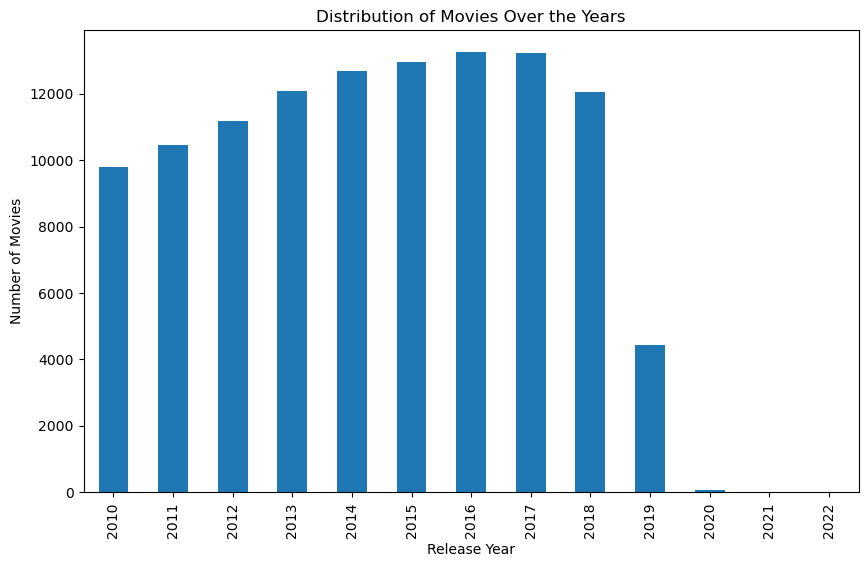

<Figure size 640x480 with 0 Axes>

In [13]:
#Ploting the distribution of movies over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_movie_basics['start_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Movies Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()
#saving image
plt.savefig('images/chart.png')

**Interpretation**
The graph shows that movie production increased gradually from 2010 t0 2016 and experienced a sharp decline to 2020.2016 had the highest number of movies while 2020 had the lowest number of movies


C:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


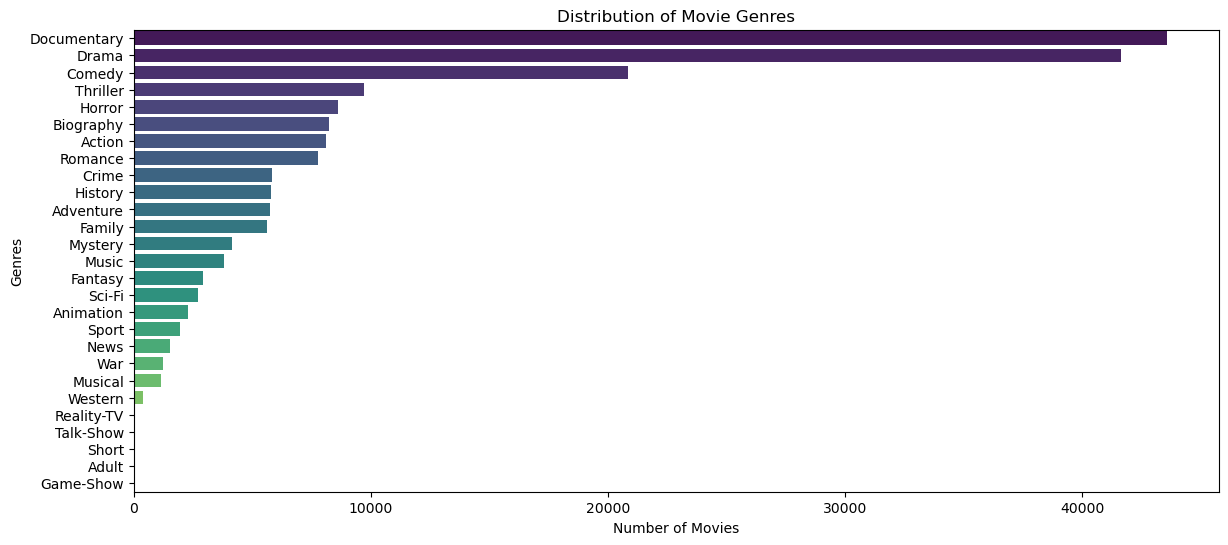

<Figure size 640x480 with 0 Axes>

In [14]:
# Genre Distribution
genres_split = df_movie_basics['genres'].str.split(',')
all_genres = [genre for genres in genres_split.dropna() for genre in genres]

# Plotting the distribution
plt.figure(figsize=(14, 6))
sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()
plt.savefig('images/chart.png') 

**Interpretation**
The plot shows that the most produced movies genre was documentary while the least was western movies.

In [15]:
# Checking the average and the median Runtime of movies.
average_runtime = df_movie_basics['runtime_minutes'].mean()
median_runtime = df_movie_basics['runtime_minutes'].median()

# Print the results
print(f"Average Runtime: {average_runtime:.2f} minutes")
print(f"Median Runtime: {median_runtime:.2f} minutes")

Average Runtime: 86.26 minutes
Median Runtime: 87.00 minutes


This shows that the average movie runs for 86.26 to 87 minutes 

In [16]:
#Reading and displaying data on movie_ratings table
df_movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
df_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
#Checking the numerical statistics for the data
df_movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [18]:
#Check for missing values 
df_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
# Query to join the two tables based on movie_id
query = """
SELECT mb.movie_id, mb.genres, mb.runtime_minutes, mr.averagerating, mr.numvotes
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id;
"""

# Execute the query and store the result in a DataFrame
merged_data = pd.read_sql_query(query, conn)

# Display the first few rows of the merged DataFrame
print(merged_data.head())

    movie_id                genres  runtime_minutes  averagerating  numvotes
0  tt0063540    Action,Crime,Drama            175.0            7.0        77
1  tt0066787       Biography,Drama            114.0            7.2        43
2  tt0069049                 Drama            122.0            6.9      4517
3  tt0069204          Comedy,Drama              NaN            6.1        13
4  tt0100275  Comedy,Drama,Fantasy             80.0            6.5       119


C:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


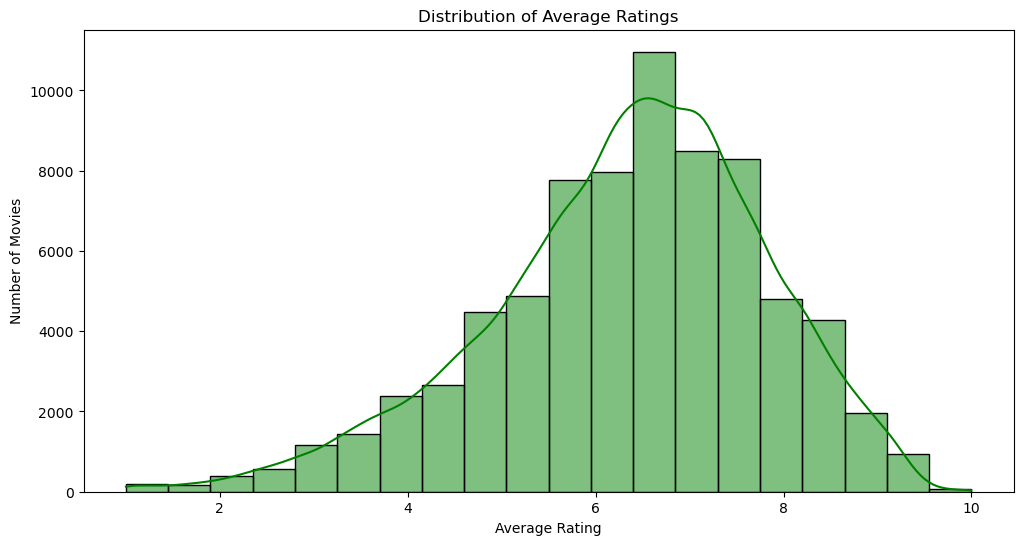

<Figure size 640x480 with 0 Axes>

In [21]:
# Ratings Analysis: Distribution of average ratings
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['averagerating'], bins=20, kde=True, color='green')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()
plt.savefig('images/chart.png')

**This chart shows that most movies had a rating of around 7 with only few ranging between 0 - 4 and 8.5-10**

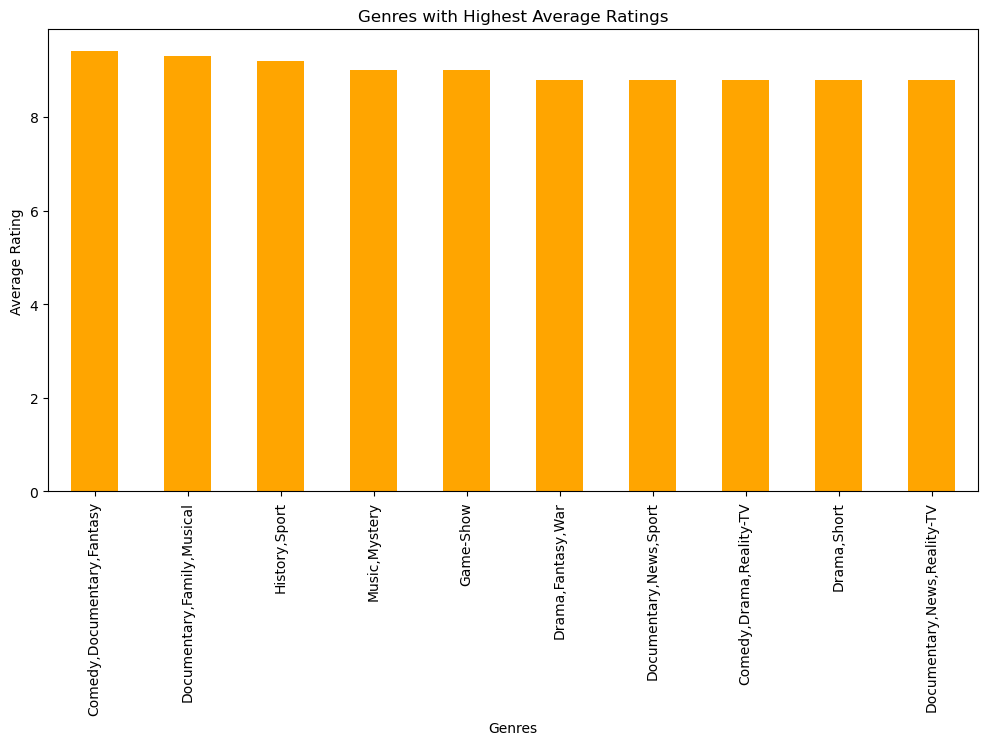

<Figure size 640x480 with 0 Axes>

In [22]:
# Successful Genres: Genres with the highest average ratings
average_ratings_by_genre = merged_data.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_ratings_by_genre.head(10).plot(kind='bar', color='orange')
plt.title('Genres with Highest Average Ratings')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.show()
plt.savefig('images/chart.png') 

**The chart shows that group mix, comedy documentary and fantasy had the highest average rating, while drama fantasy and war having the lowest average rating**

**ANALYSIS Of GROSS INCOME DATA**


In [23]:
#importing and displaying bom csv file 
bom_movies_gross = pd.read_csv(r'C:\Users\Hp\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\bom.movie_gross.csv')

bom_movies_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
#Checking for missing data 
bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
#cleaning the data for missing rows
bom_movies_clean = bom_movies_gross.dropna()

In [26]:
#modify the original data
bom_movies_gross.dropna(inplace=True)
bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [27]:
#checking if domestic gross and foreign gross are in numerics
print(bom_movies_gross['domestic_gross'].dtype)
print(bom_movies_gross['foreign_gross'].dtype)

float64
object


In [28]:
# Convert 'foreign_gross' to numeric
#coerce errors will replace non-numeric values with NaN
bom_movies_gross['foreign_gross'] = pd.to_numeric(bom_movies_gross['foreign_gross'], errors='coerce')

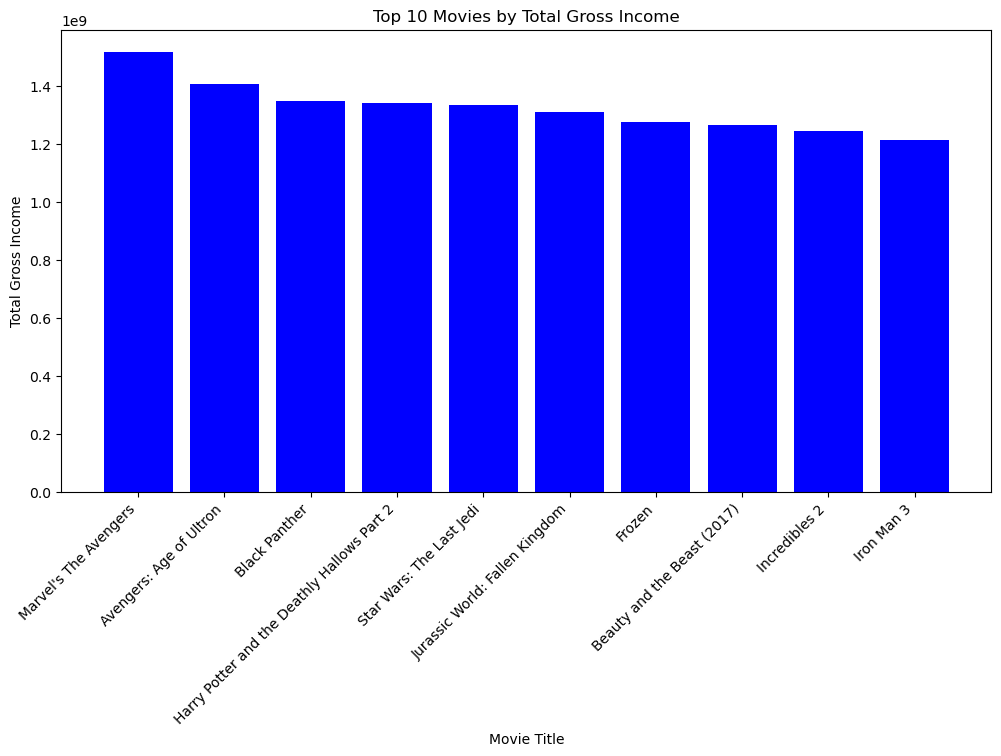

<Figure size 640x480 with 0 Axes>

In [29]:
#ploting the top ten movies against their gross income
bom_movies_gross['total_gross'] = bom_movies_gross['domestic_gross'] + bom_movies_gross['foreign_gross']
sorted_movies = bom_movies_gross.sort_values(by='total_gross', ascending=False)

# Specify the top N movies you want to visualize
top_n = 10

# Plotting the top 10 movies
plt.figure(figsize=(12, 6))
plt.bar(sorted_movies['title'].head(top_n), sorted_movies['total_gross'].head(top_n), color='blue')
plt.title(f'Top {top_n} Movies by Total Gross Income')
plt.xlabel('Movie Title')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.savefig('images/chart.png') 

The graph shows that marvels avengers had the highest gross income among the movies


C:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


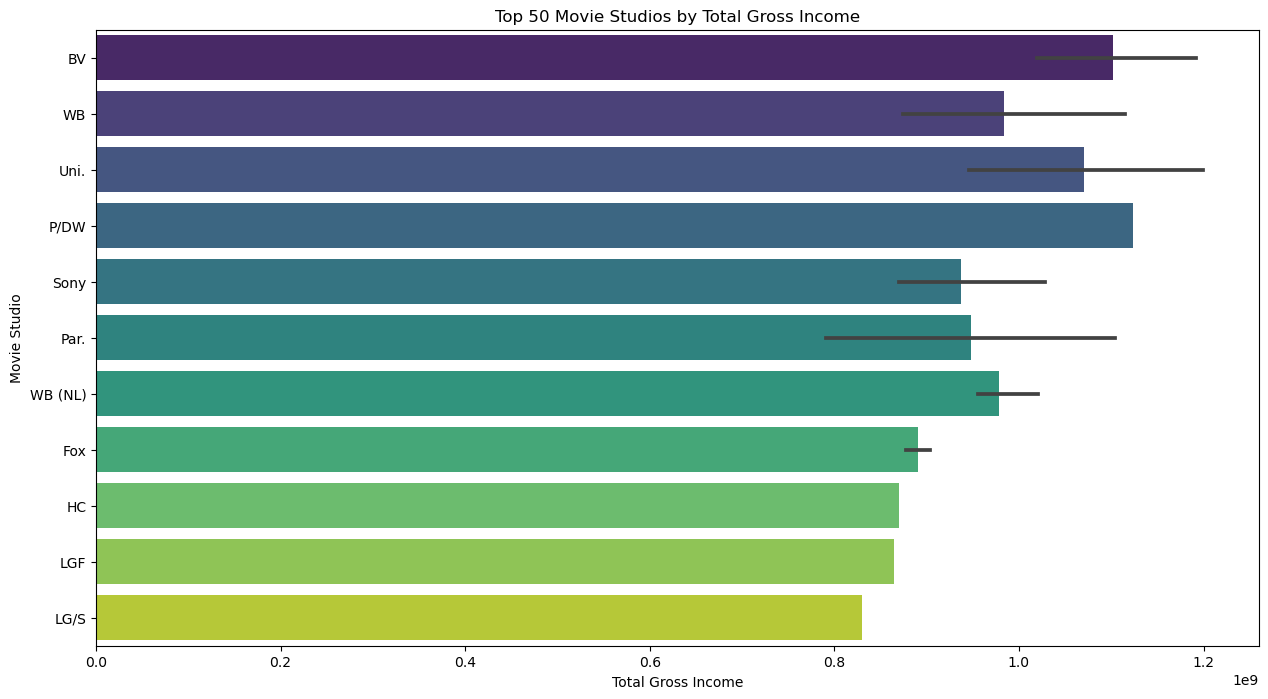

<Figure size 640x480 with 0 Axes>

In [30]:
#comparing movies studios against gross income
# Sort the DataFrame by total gross income in descending order
sorted_movies = bom_movies_gross.sort_values(by='total_gross', ascending=False)

# Selecting only the top 20 movie studios
top_50_studios = sorted_movies.head(50)

# Plotting the total gross income for the top 50 movie studios
plt.figure(figsize=(15, 8))
sns.barplot(x='total_gross', y='studio', data=top_50_studios, palette='viridis')
plt.title('Top 50 Movie Studios by Total Gross Income')
plt.xlabel('Total Gross Income')
plt.ylabel('Movie Studio')
plt.show()
plt.savefig('images/chart.png') 

ANAYZING MOVIE BUDGETS

In [31]:
#import csv file tom movie budgets
tom_movie_budgets = pd.read_csv(r'C:\Users\Hp\Downloads\learn-co-curriculum dsc-phase-1-project-v2-4 master zippedData\tn.movie_budgets.csv')
tom_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
#checking data uniformity
tom_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [33]:
#Ploting the top 20 movies against their profits
# Convert currency columns to numeric
tom_movie_budgets['production_budget'] = pd.to_numeric(tom_movie_budgets['production_budget'].replace('[\$,]', '', regex=True))
tom_movie_budgets['worldwide_gross'] = pd.to_numeric(tom_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True))

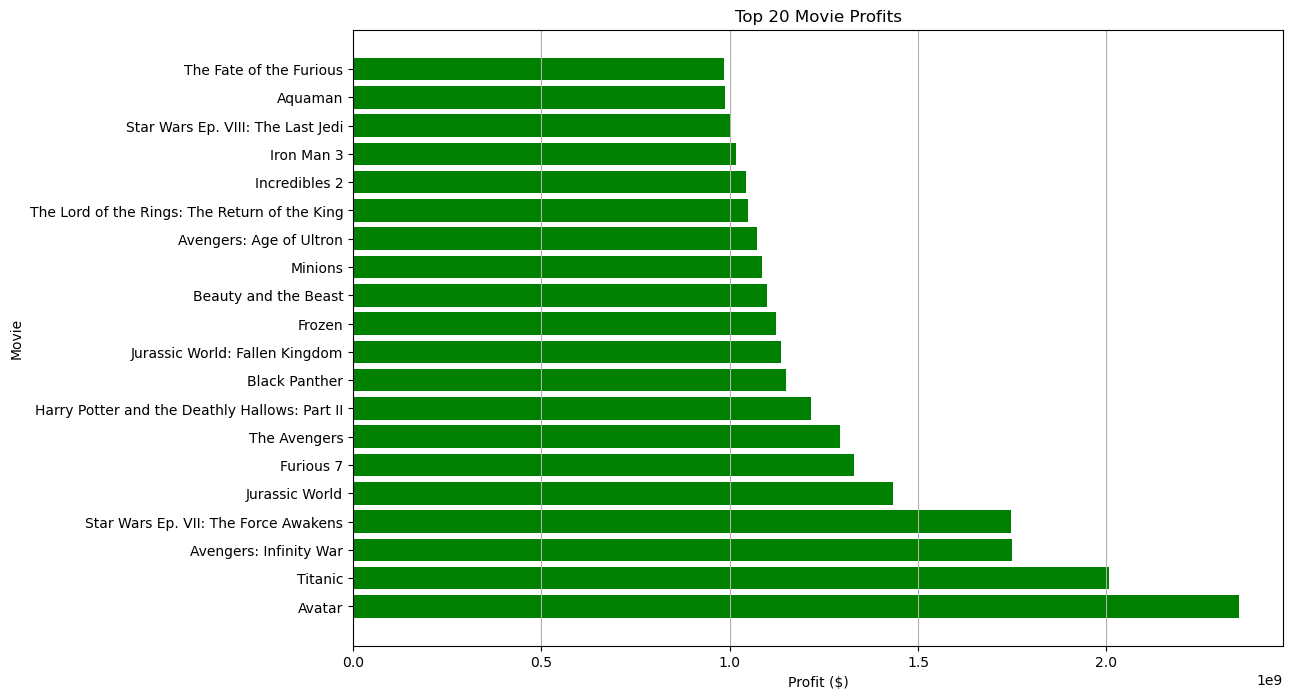

<Figure size 640x480 with 0 Axes>

In [34]:
# Calculate profit
tom_movie_budgets['profit'] = tom_movie_budgets['worldwide_gross'] - tom_movie_budgets['production_budget']

# Sort DataFrame by profit in descending order
tom_movie_budgets = tom_movie_budgets.sort_values(by='profit', ascending=False)

# Select the top 20 movies
tom_movie_budgets_top_20 = tom_movie_budgets.head(20)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(tom_movie_budgets_top_20['movie'], tom_movie_budgets_top_20['profit'], color='green')
plt.title('Top 20 Movie Profits')
plt.xlabel('Profit ($)')
plt.ylabel('Movie')
plt.grid(axis='x')
plt.show()
plt.savefig('images/chart.png')

**The plot shows that Avatar had the highest profits of more than $2B**

**BUSINESS RECOMMENDATIONS**

**Genre Selection for New Movies:

Microsoft should consider focusing on genres that have shown popularity and resilience, such as documentary and fantasy. Movies that entails a mix of action,adventure and fantasy have proved to be the highest grossing films. However, they should also consider exploring opportunities in genres that are less saturated, like westerns, so as to capture a niche audience.

**Optimizing Movie Runtimes:

The average and median runtime findings suggest that audiences generally prefer movies with a runtime around 86-87 minutes. Microsoft should aim to produce movies within this range so as to align with viewer preferences and also maximize engagement

**Content Quality and Ratings:

Microsoft should prioritize in creating high-quality content, as shown in the average movie ratings. This can be achieved focusing on engaging storylines, skilled production, and effective marketing strategies.

**Strategic Partnerships and Franchise Development:

The success of movie franchise like "Marvel's Avengers" and "Avatar" suggests that  partnerships and potential franchise opportunities can significantly impact box office performance and profits. Microsoft should consider collaborations with established franchises or invest in developing its own franchises to drive long-term success. Microsoft should also consider patnership with movie studios like BV, WB and P/WD which had the highest movie gross income.

**Profit Maximization Strategies:

Microsoft should study the success factors behind high-grossing movies like "Avatar" and incorporate those elements into its own productions. This may include investing in top-tier talent actors, innovative storytelling, and effective marketing campaigns to maximize profits.

**CONCLUSION**
These recommendations aim to guide Microsoft in making informed decisions based on the insights derived from the exploratory data analysis. It's essential for Microsoft to adapt these recommendations to their specific goals, resources, and market dynamics. Additionally, monitoring and adaptating industry trends is very crucial for long-term success in the movie production business.
